# Homework 3 #

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset_path = "/home/gui_ze/Desktop/Machine-Learning/datasets/parkinsons.csv"

df = pd.read_csv(dataset_path)

In [5]:
X = df.drop(columns=['target'])
y = df['target']

def linearRegression(X, y, i):
    # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # create the model
    model = LinearRegression()

    # train the model
    model.fit(X_train, y_train)

    # test the model using mae as loss function
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

def mlp_no_act(X, y, i):
     # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Create the Model
    mlp_no_act = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'identity', random_state = 0)
    # Train the Model
    mlp_no_act.fit(X_train, y_train)

    # Test the Model usin MAE as loss function
    y_pred = mlp_no_act.predict(X_test)
    mae_mlp_no_act = mean_absolute_error(y_test, y_pred)

    return mae_mlp_no_act  

def mlp_relu(X, y, i):
    # split the data with 80% in training and 20% in testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    mlp_relu = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'relu', random_state = 0)
    mlp_relu.fit(X_train, y_train)

    y_pred = mlp_relu.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    return mae

    


In [6]:
mlp_relu_avg = []
mlp_no_act_avg = []
linearRegression_avg = []
for i in range(10):
    mlp_relu_avg.append(mlp_relu(X, y, i))
    mlp_no_act_avg.append(mlp_no_act(X, y, i))
    linearRegression_avg.append(linearRegression(X, y, i))

print("MLP RELU: ", np.mean(mlp_relu_avg))
print("MLP NO ACT: ", np.mean(mlp_no_act_avg))
print("Linear Regression: ", np.mean(linearRegression_avg))

/home/gui_ze/anaconda3/envs/aprendizagem-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gui_ze/anaconda3/envs/aprendizagem-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gui_ze/anaconda3/envs/aprendizagem-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gui_ze/anaconda3/envs/aprendizagem-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

MLP RELU:  5.937812508118391
MLP NO ACT:  8.099745996058
Linear Regression:  8.09721948314559


{'whiskers': [<matplotlib.lines.Line2D at 0x722109630670>,
 'caps': [<matplotlib.lines.Line2D at 0x722109630bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7221096303d0>,
 'medians': [<matplotlib.lines.Line2D at 0x722109643130>,
 'fliers': [<matplotlib.lines.Line2D at 0x7221096433d0>,
 'means': []}

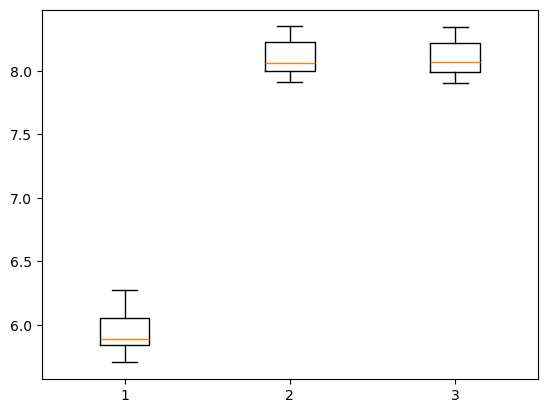

In [7]:
# boxplot 

data = [mlp_relu_avg, mlp_no_act_avg, linearRegression_avg]
plt.boxplot(data)

In [ ]:
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

X = df.drop(columns=['target'])
y = df['target']

# split the data with 80% in training and 20% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)

# Scoring Function
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring = scorer)

# Fit the model to your data
grid_search.fit(X_train, y_train)


/home/gui_ze/anaconda3/envs/aprendizagem-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

# Previsão no conjunto de teste com os melhores parâmetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular o MAE no conjunto de teste
mae_test = mean_absolute_error(y_test, y_pred)
print(f"MAE no conjunto de teste: {mae_test:.4f}")

# Visualizar os resultados da Grid Search
results = pd.DataFrame(grid_search.cv_results_)

# Criar subplots para cada valor de batch_size
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre os tamanhos de batch e plotar os resultados
for i, batch_size in enumerate(param_grid['batch_size']):
    ax = axs[i]
    for alpha in param_grid['alpha']:
        subset = results[(results['param_batch_size'] == batch_size) & (results['param_alpha'] == alpha)]
        ax.plot(subset['param_learning_rate_init'], -subset['mean_test_score'], label=f'alpha={alpha}')
    
    ax.set_xscale('log')
    ax.set_xlabel('Taxa de Aprendizagem (learning_rate_init)')
    ax.set_title(f'Batch Size = {batch_size}')
    ax.legend()

axs[0].set_ylabel('Test MAE')
plt.suptitle('MAE em função da taxa de aprendizagem para diferentes valores de L2 e batch size')
plt.show()